# **Projeto - Analisando dados do Varejo**

![](https://lh3.googleusercontent.com/proxy/STJ5N9gF2KdUkSQF8pDXf2AXdaOqq1WUWl1SjI_Uj5Cei6IX2jp6XDPx33Y2F2c3Z_mBQtXxYV1ze2cDbqh0zu0kRdzu77h4g_cDQ0QDUtUdmGb0utd1TaU)

In [ ]:
#Importando as bibliotecas utilizadas:

#Manipulação de dados
import pandas as pd

#Visualização
import missingno 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# **Sobre a Fonte de Dados analisada:**

Fonte de dados do **comércio eletrônico do Reino Unido** contendo **transações de 2010 a 2011**.

Conteúdo:

"Este é um conjunto de dados de uma transnacional que contém todas as transações que ocorrem entre 01/12/2010 e 09/12/2011, para uma empresa de varejo situada no reino UNIDO e registrada como loja de varejo on-line. A empresa vende principalmente produtos relacionados a presentes. Muitos clientes da empresa são atacadistas."


As análises para este conjunto de dados pode incluir o tempo de série, clustering, classificação e mais. 

**Ao final constam as principais análises realizadas** tais como: dias com maior número de vendas, quais paises em que houveram mais vendas e qual mais gastou, a hora em que houve maior número de pedidos, dentre outras.

https://www.kaggle.com/carrie1/ecommerce-data

In [ ]:
#Importação do banco de dados ou dataset:
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

In [ ]:
df.head() 
#mostra por padrão os 5 primeiros elementos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()
# mostra os 5 últimos elementos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
type(df)

pandas.core.frame.DataFrame

 **Como temos várias colunas é um "dataframe", se tivéssemos apenas uma coluna seria uma "série".**

In [ ]:
type(df["InvoiceNo"])

pandas.core.series.Series

In [ ]:
type(df.InvoiceNo)

pandas.core.series.Series

# **Análise Exploratória dos Dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Renomeando as colunas:

df.rename(columns={"InvoiceNo": "NumFatura", "StockCode":"CodigoProduto",
                  "Description": "NomeProduto", "Quantity": "QuantProduto",
                   "InvoiceDate": "DataHoraTransacao", "UnitPrice": "PrecoUnitario",
                   "CustomerID": "NumCliente", "Country": "Pais"}, inplace = True) 

In [ ]:
#observação: são 8 colunas e 541.909 linhas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NumFatura          541909 non-null  object 
 1   CodigoProduto      541909 non-null  object 
 2   NomeProduto        540455 non-null  object 
 3   QuantProduto       541909 non-null  int64  
 4   DataHoraTransacao  541909 non-null  object 
 5   PrecoUnitario      541909 non-null  float64
 6   NumCliente         406829 non-null  float64
 7   Pais               541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **Informações sobre os atributos (variáveis):**

Número da Fatura - NumFatura

Código do Produto - CodigoProduto

Nome do Produto - NomeProduto

Quantidade do Produto - QuantProduto

Data e Hora da Transação - DataHoraTransacao

Preço Unitário - PrecoUnitario

Número do Cliente - NumCliente

País - Pais

In [ ]:
df.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Nota-se aqui valores negativos de Quantidade do Produto e Preço Unitário, o que não condiz com a realidade.
df.describe()

,QuantProduto,PrecoUnitario,NumCliente
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
type(df.columns)

pandas.core.indexes.base.Index

In [ ]:
df.columns


Index(['NumFatura', 'CodigoProduto', 'NomeProduto', 'QuantProduto',
       'DataHoraTransacao', 'PrecoUnitario', 'NumCliente', 'Pais'],
      dtype='object')

In [ ]:
#Traz variáveis categóricas, ou seja, não numéricas
df.describe(include="O")

,NumFatura,CodigoProduto,NomeProduto,DataHoraTransacao,Pais
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


#**Verificação de valores ausentes**

In [ ]:
#Verificando se existem alguns valores ausentes:
df.isnull().sum()

NumFatura                 0
CodigoProduto             0
NomeProduto            1454
QuantProduto              0
DataHoraTransacao         0
PrecoUnitario             0
NumCliente           135080
Pais                      0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

NumCliente           135080
NomeProduto            1454
Pais                      0
PrecoUnitario             0
DataHoraTransacao         0
QuantProduto              0
CodigoProduto             0
NumFatura                 0
dtype: int64

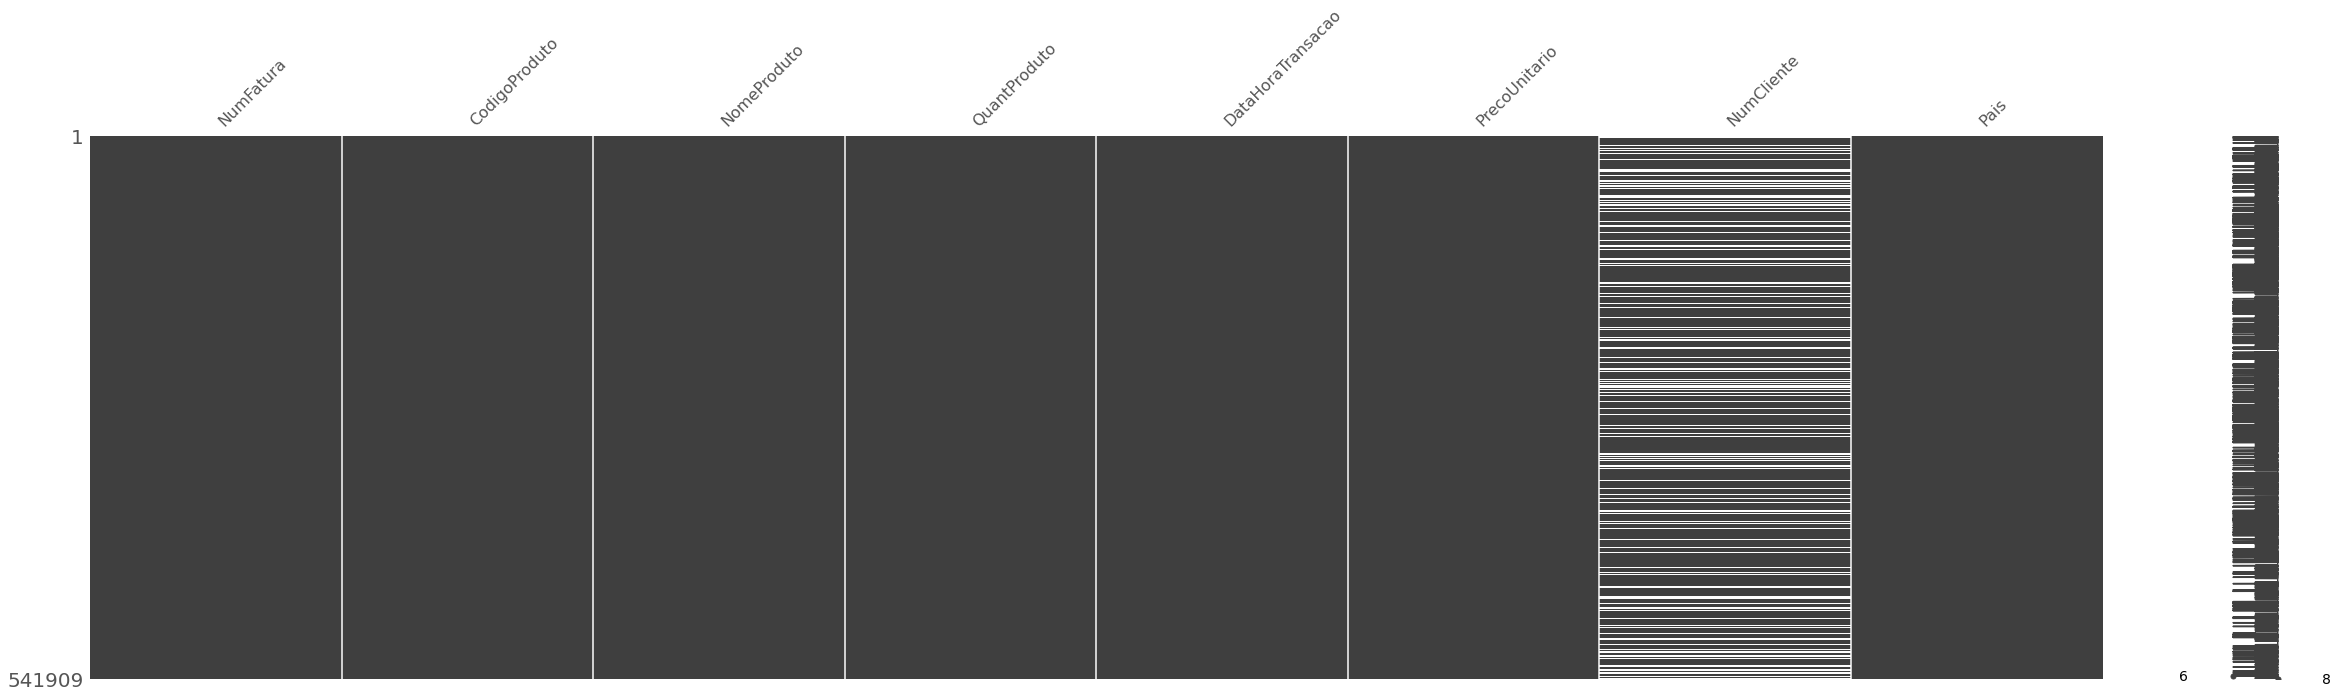

In [ ]:
#Verificando os valores ausentes em forma de gráfico:
missingno.matrix(df, figsize = (40,10))

In [ ]:
df[df.isnull().any(axis=1)].head(10)

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [ ]:
# número de linhas e colunas:
df.shape

(541909, 8)

In [ ]:
linhas, colunas = df.shape

In [ ]:
print(linhas)

541909


In [ ]:
print(colunas)

8


In [ ]:
#Analisando o percentual de dados faltantes:
faltantes_percentual = (df.isnull().sum() / linhas) * 100

In [ ]:
print(f"Percentual de dados faltantes {faltantes_percentual}")

Percentual de dados faltantes NumFatura             0.000000
CodigoProduto         0.000000
NomeProduto           0.268311
QuantProduto          0.000000
DataHoraTransacao     0.000000
PrecoUnitario         0.000000
NumCliente           24.926694
Pais                  0.000000
dtype: float64


In [ ]:
faltantes_percentual

NumFatura             0.000000
CodigoProduto         0.000000
NomeProduto           0.268311
QuantProduto          0.000000
DataHoraTransacao     0.000000
PrecoUnitario         0.000000
NumCliente           24.926694
Pais                  0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NumFatura          541909 non-null  object 
 1   CodigoProduto      541909 non-null  object 
 2   NomeProduto        540455 non-null  object 
 3   QuantProduto       541909 non-null  int64  
 4   DataHoraTransacao  541909 non-null  object 
 5   PrecoUnitario      541909 non-null  float64
 6   NumCliente         406829 non-null  float64
 7   Pais               541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**O formato de DataHoraTransacao está como Object, então vamos mudar para o formato time stamp:**





In [ ]:
df["DataHoraTransacao"] = pd.to_datetime(df.DataHoraTransacao, format="%m/%d/%Y %H:%M")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   NumFatura          541909 non-null  object        
 1   CodigoProduto      541909 non-null  object        
 2   NomeProduto        540455 non-null  object        
 3   QuantProduto       541909 non-null  int64         
 4   DataHoraTransacao  541909 non-null  datetime64[ns]
 5   PrecoUnitario      541909 non-null  float64       
 6   NumCliente         406829 non-null  float64       
 7   Pais               541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Remover Linhas com valores ausentes**

In [ ]:
#Removendo os dados faltantes:
df_remove_faltantes = df.dropna()

In [ ]:
df_remove_faltantes.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


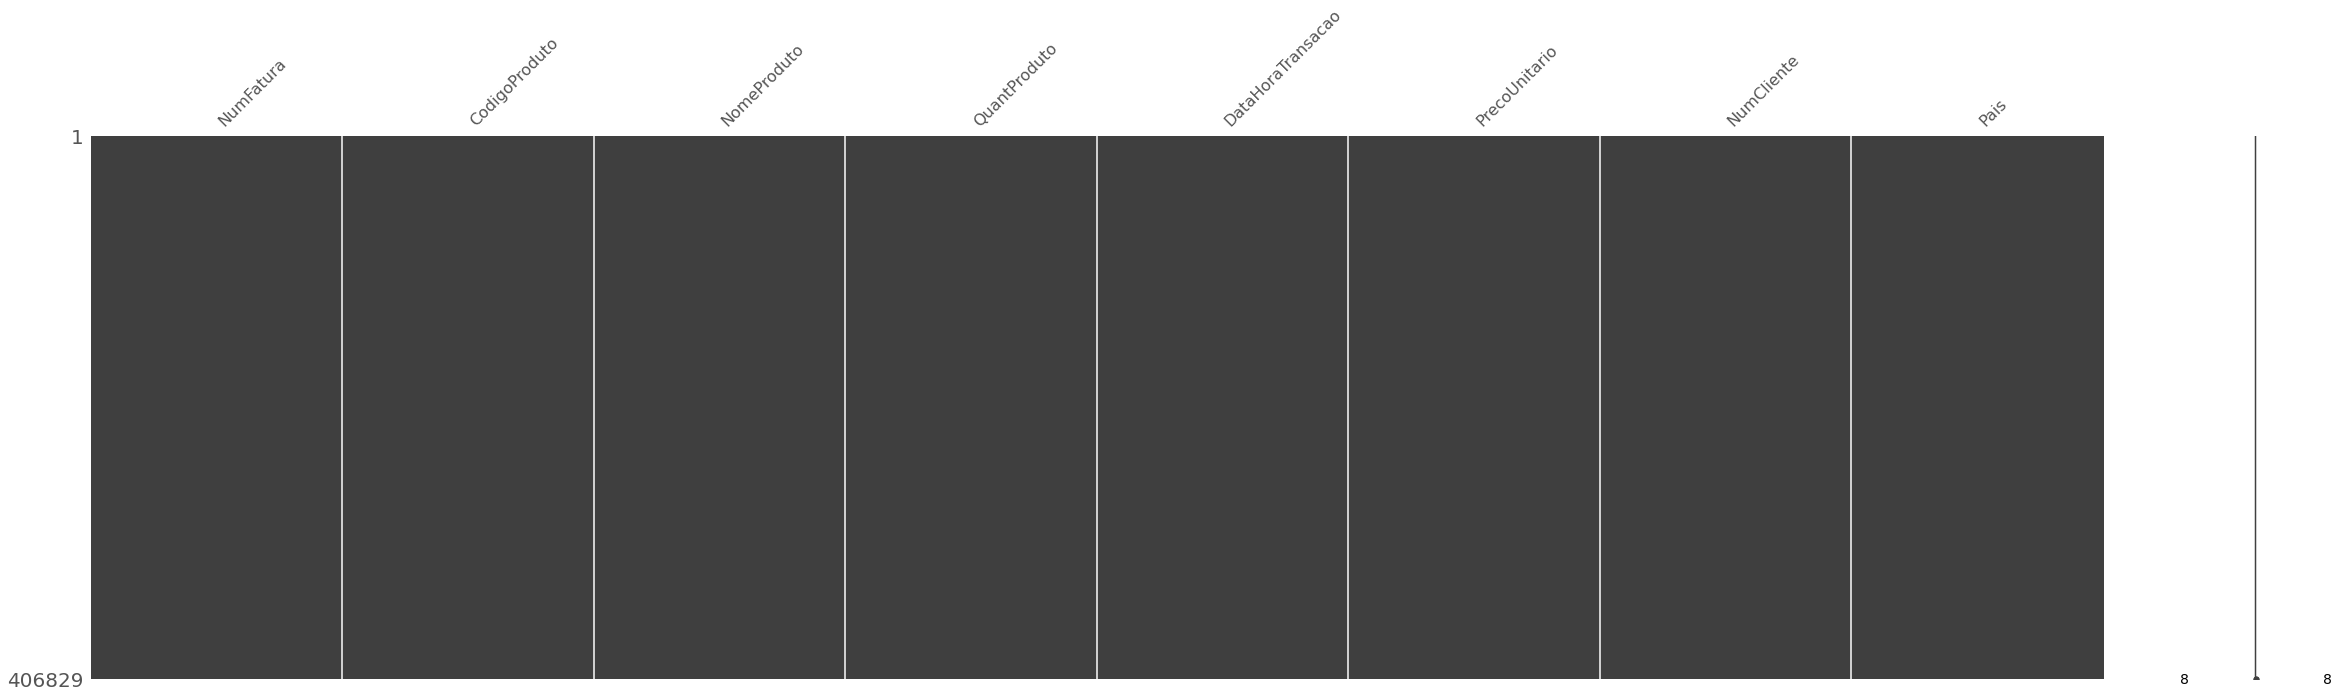

In [ ]:
missingno.matrix(df_remove_faltantes, figsize = (40,10))

In [ ]:
df_remove_faltantes.isnull().sum().sort_values(ascending=False)

Pais                 0
NumCliente           0
PrecoUnitario        0
DataHoraTransacao    0
QuantProduto         0
NomeProduto          0
CodigoProduto        0
NumFatura            0
dtype: int64

In [ ]:
df_remove_faltantes.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Mudando o tipo de NumCliente de float para inteiro:
df_remove_faltantes["NumCliente"] = df_remove_faltantes["NumCliente"].astype("int64")

In [ ]:
df_remove_faltantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   NumFatura          406829 non-null  object        
 1   CodigoProduto      406829 non-null  object        
 2   NomeProduto        406829 non-null  object        
 3   QuantProduto       406829 non-null  int64         
 4   DataHoraTransacao  406829 non-null  datetime64[ns]
 5   PrecoUnitario      406829 non-null  float64       
 6   NumCliente         406829 non-null  int64         
 7   Pais               406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [ ]:
df_remove_faltantes.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
#Alterando o nome do dataframe de df_remove_faltantes para df_retail:
df_retail = df_remove_faltantes.copy()

In [ ]:
df_retail.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
df_retail.describe()

,QuantProduto,PrecoUnitario,NumCliente
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Descrevendo os números para apenas duas casas após a vírgula:
df_retail.describe().round(2)

,QuantProduto,PrecoUnitario,NumCliente
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


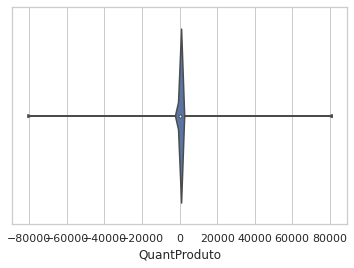

In [ ]:
# biblioteca do seaborn (sns)
sns.set(style = 'whitegrid')
ax = sns.violinplot(x=df_retail["QuantProduto"])

In [ ]:
#Analisando quais os dados de QuantProduto estão negativos:
df_retail[df["QuantProduto"] < 0].head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


**#Dados mostram padrão de compra, por isso que existem quantidades do produto com valor negativo justamente para os números da fatura com o "C" inicial de "Fatura Cancelada".**


In [ ]:
#unique traz todos os valores
df["QuantProduto"].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

# **Remover linhas com valores negativos**

In [ ]:
# Excluir valores negativos para trabalhar apenas com as compras que foram validadas.
df_retail = df_retail[df_retail["QuantProduto"] > 0]

In [ ]:
df_retail["QuantProduto"].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [ ]:
#Observe que o número de linhas diminuiu:
df_retail

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
df_retail.describe().round(2)

,QuantProduto,PrecoUnitario,NumCliente
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


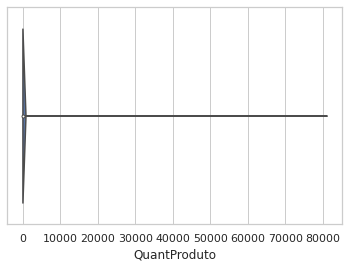

In [ ]:
ax = sns.violinplot(x=df_retail["QuantProduto"])

# **Para analisar quanto foi gasto basta acrescentar a coluna Total Gasto:**

In [ ]:
# Nova coluna, com a multiplicação entre a quantidade e o preço da unidade:
df_retail["TotalGasto"] = df_retail["QuantProduto"] * df_retail["PrecoUnitario"]

In [ ]:
df_retail

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## **Verificar o quanto foi gasto no Ano e no Mês:**

In [ ]:
# Verificando quanto foi gasto no Ano e Mês:
df_retail["AnoMes"] = df_retail["DataHoraTransacao"].dt.to_period("M")

In [ ]:
df_retail.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto,AnoMes,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


## **Adicionando algumas colunas como Dia, Mês e Ano**

In [ ]:
# Método getattr () retorna o valor do atributo nomeado de um objeto
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df_retail = df_retail.join(pd.concat((getattr(df_retail['DataHoraTransacao'].dt, i).rename(i) for i in L), axis=1))


In [ ]:
df_retail.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto,AnoMes,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [ ]:
df_retail.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

In [ ]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   NumFatura          397924 non-null  object        
 1   CodigoProduto      397924 non-null  object        
 2   NomeProduto        397924 non-null  object        
 3   QuantProduto       397924 non-null  int64         
 4   DataHoraTransacao  397924 non-null  datetime64[ns]
 5   PrecoUnitario      397924 non-null  float64       
 6   NumCliente         397924 non-null  int64         
 7   Pais               397924 non-null  object        
 8   TotalGasto         397924 non-null  float64       
 9   AnoMes             397924 non-null  period[M]     
 10  year               397924 non-null  int64         
 11  month              397924 non-null  int64         
 12  day                397924 non-null  int64         
 13  dayofweek          397924 non-null  int64   

In [ ]:
df_retail['dayofweek'] = df_retail['dayofweek'] + 1

In [ ]:
df_retail.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto,AnoMes,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,4,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,4,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4


In [ ]:
sales_por_custo = df_retail.groupby(by=['NumCliente','Pais'], as_index=False)['NumFatura'].count().sort_values(by='NumFatura', ascending=False)

In [ ]:
sales_por_custo.columns = ['NumCliente', 'Pais', 'NumVendas']

In [ ]:
sales_por_custo.head(10)

,NumCliente,Pais,NumVendas
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


## **Visualizando o número de vendas para todos os clientes:**

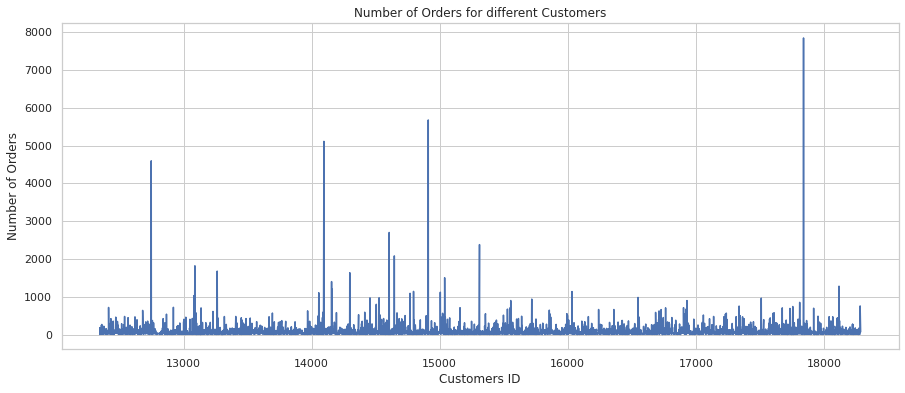

In [ ]:
orders = df_retail.groupby(by=['NumCliente','Pais'], as_index=False)['NumFatura'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.NumCliente, orders.NumFatura)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()


   ** - Consolidando o número de vendas feitas por cliente (receita)**
   
  **  - Usamos index = False, para indicar ao groupby que não queremos definir o ID da coluna como índice **







In [ ]:
gasto_por_custo = df_retail.groupby(by=['NumCliente','Pais'], as_index=False)['TotalGasto'].sum().sort_values(by='TotalGasto', ascending=False)

In [ ]:
gasto_por_custo.columns = ['NumCliente', 'Pais', "TotalGasto"]

In [ ]:
gasto_por_custo.head(10)

,NumCliente,Pais,TotalGasto
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


**Padrões de Compra**

In [ ]:
df_retail.head()

,NumFatura,CodigoProduto,NomeProduto,QuantProduto,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto,AnoMes,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,4,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,4,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4


**Inserindo uma nova coluna como nossa 3ª linha (índice 2) com year_month, juntando nosso ano com mês de nosso campo InvoiceDate:**

In [ ]:
df_retail.insert(loc=2, column='AnoEMes', value=df_retail['DataHoraTransacao'].map(lambda x: 100*x.year + x.month))

**Inserindo uma nova coluna como nossa 6ª coluna (índice 5) com nossa Hora extraída de InvoiceDate:**

In [ ]:
df_retail.insert(loc=5, column='hora', value=df_retail.DataHoraTransacao.dt.hour)

In [ ]:
df_retail.head()

,NumFatura,CodigoProduto,AnoEMes,NomeProduto,QuantProduto,hora,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto,AnoMes,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,4,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,4,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4


## **Quantos pedidos foram feitos pelos Clientes?**

**Número de Pedidos por dia da semana:**

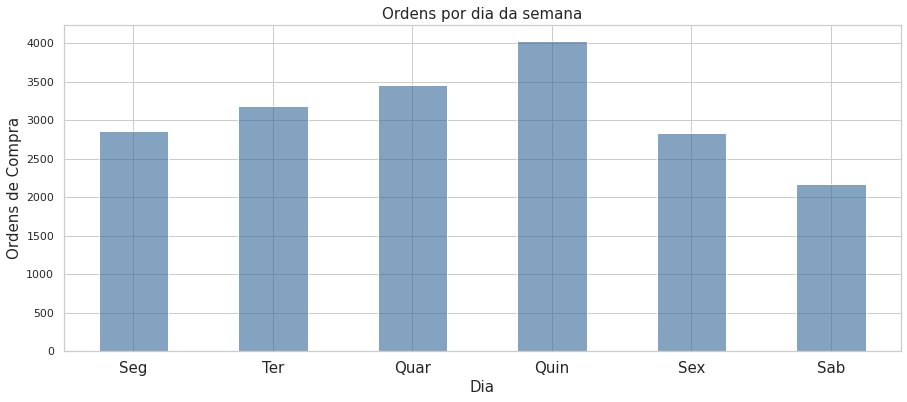

In [ ]:
# Create a plot for the above
ax = df_retail.groupby('NumFatura')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6),figsize=(15,6))
ax.set_xlabel('Dia',fontsize=15)
ax.set_ylabel('Ordens de Compra',fontsize=15)
ax.set_title('Ordens por dia da semana',fontsize=15)
ax.set_xticklabels(('Seg','Ter','Quar','Quin','Sex','Sab'), rotation='horizontal', fontsize=15)
plt.show()

**Número de Pedidos por Hora:**

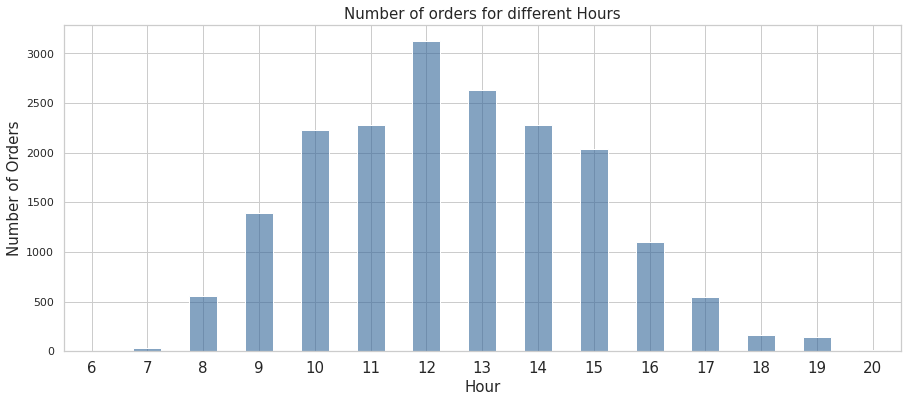

In [ ]:
ax = df_retail.groupby('NumFatura')['hora'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6),figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

## **Analisando os preços unitários dos itens**

In [ ]:
df_retail.PrecoUnitario.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: PrecoUnitario, dtype: float64

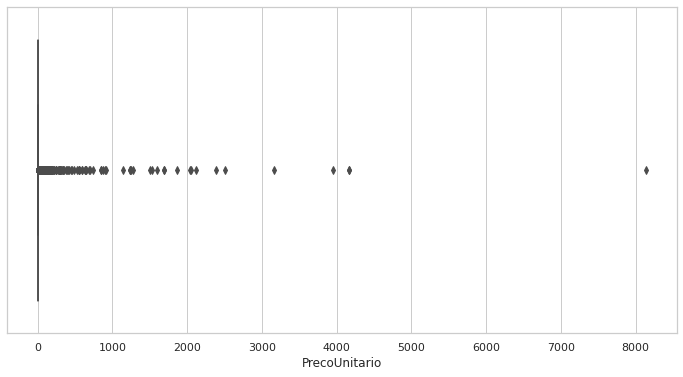

In [ ]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_retail.PrecoUnitario)
plt.show()

In [ ]:
#Alguns Itens parecem terem sidos grátis
df_retail_free = df_retail[df_retail.PrecoUnitario == 0]

In [ ]:
print(len(df_retail_free))

40


In [ ]:
df_retail_free.head()

,NumFatura,CodigoProduto,AnoEMes,NomeProduto,QuantProduto,hora,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto,AnoMes,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,8,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,5,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,3,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,5,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,5,6,1,1


In [ ]:
#Quando esses itens grátis foram distribuídos
df_retail_free.AnoMes.value_counts().sort_index()

2010-12     3
2011-01     3
2011-02     1
2011-03     2
2011-04     2
2011-05     2
2011-07     2
2011-08     6
2011-09     2
2011-10     3
2011-11    14
Freq: M, Name: AnoMes, dtype: int64

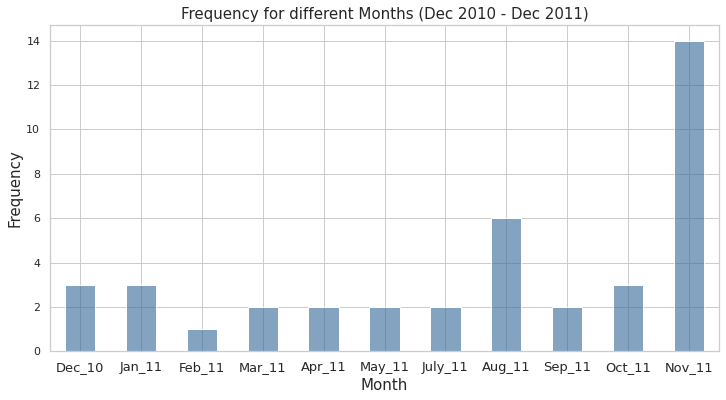

In [ ]:
ax = df_retail_free.AnoMes.value_counts().sort_index().plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6), figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

## **Análise por País**

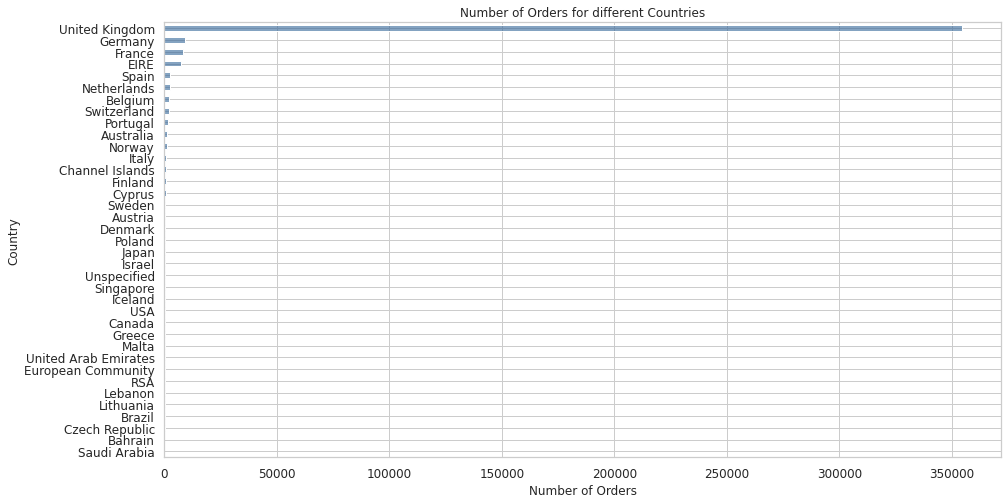

In [ ]:
group_ordens_pais = df_retail.groupby('Pais')['DataHoraTransacao'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_ordens_pais.plot(kind='barh', fontsize=12, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

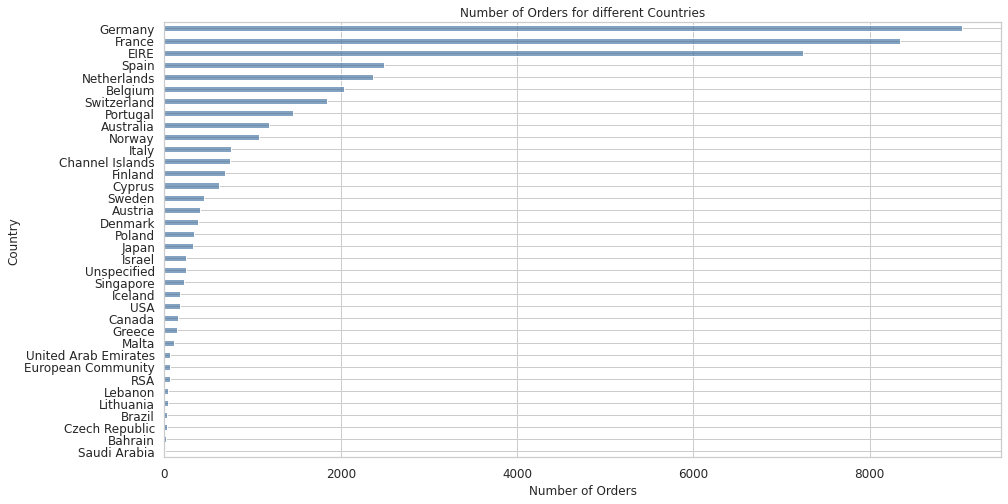

In [ ]:
#Excluindo UK
group_ordens_pais = df_retail.groupby('Pais')['DataHoraTransacao'].count().sort_values()
group_ordens_pais_sem_uk = group_ordens_pais.copy()
del group_ordens_pais_sem_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_ordens_pais_sem_uk.plot(kind='barh', fontsize=12, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

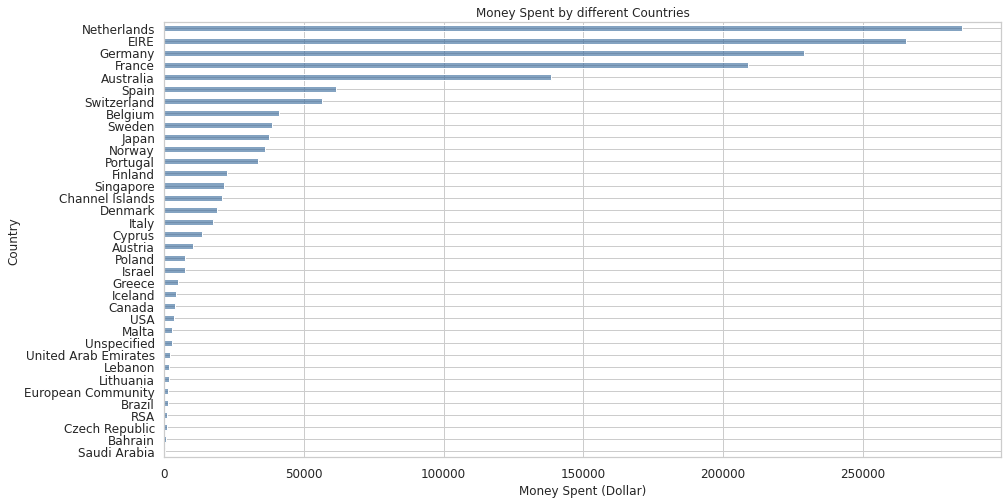

In [ ]:
# Valor Gasto por Cada Pais (Sem UK)
group_country_valor_gasto = df_retail.groupby('Pais')['TotalGasto'].sum().sort_values()
del group_country_valor_gasto['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_valor_gasto.plot(kind='barh', fontsize=12, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## **Análise dos Clientes**

In [ ]:
data_min = df_retail['DataHoraTransacao'].min()
print(data_min)

2010-12-01 08:26:00


In [ ]:
data_max = df_retail['DataHoraTransacao'].max()
print(data_max)

2011-12-09 12:50:00


In [ ]:
# Get our date range for our data
print(f"Dias {data_max - data_min}")

Dias 373 days 04:24:00


In [ ]:
df_retail = df_retail.loc[df_retail['DataHoraTransacao'] < '2011-12-01']

In [ ]:
df_retail.head()

,NumFatura,CodigoProduto,AnoEMes,NomeProduto,QuantProduto,hora,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto,AnoMes,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,4,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,4,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4


In [ ]:
#Valor Gasto por Fatura (Associando ao Cliente e ao Pais)
invoice_customer_df = df_retail.groupby(by=['NumFatura','DataHoraTransacao']).agg({'TotalGasto': sum,'NumCliente': max,'Pais': max,}).reset_index()       

In [ ]:
invoice_customer_df.head()

,NumFatura,DataHoraTransacao,TotalGasto,NumCliente,Pais
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [ ]:
invoice_customer_df = df_retail.groupby(by=['NumFatura','DataHoraTransacao']).agg({'TotalGasto': sum,'NumCliente': max,'Pais': max,}).reset_index().sort_values(by='TotalGasto', ascending=False) 

In [ ]:
invoice_customer_df.head()

,NumFatura,DataHoraTransacao,TotalGasto,NumCliente,Pais
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom


In [ ]:
invoice_customer_df.tail()

,NumFatura,DataHoraTransacao,TotalGasto,NumCliente,Pais
13819,570554,2011-10-11 11:02:00,0.38,14800,United Kingdom
17390,578841,2011-11-25 15:57:00,0.00,13256,United Kingdom
2730,543599,2011-02-10 13:08:00,0.00,17560,United Kingdom
12875,568384,2011-09-27 09:46:00,0.00,12748,United Kingdom
11327,564651,2011-08-26 14:19:00,0.00,14646,Netherlands



    

*   Definimos nosso índice para a data da nossa fatura
*   E usar Grouper (freq = 'M') agrupa dados pelo índice 'InvoiceDate' por Mês
*   Em seguida, agrupamos esses dados por CustomerID e contamos o número de clientes repetidos exclusivos para aquele mês (os dados são a data de término do mês)
*   A função de filtro nos permite subselecionar dados pela regra em nossa função lambda, ou seja, aqueles maiores que 1 (clientes repetidos)











In [ ]:
# O mês que houve maior número de transação foi o mês de novembro de 2011
monthly_repeat_customers_df = invoice_customer_df.set_index('DataHoraTransacao').groupby(
    [pd.Grouper(freq='M'), 'NumCliente']).filter(lambda x: len(x) > 1).resample('M').nunique()['NumCliente']

monthly_repeat_customers_df

DataHoraTransacao
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: NumCliente, dtype: int64

In [ ]:
# Maior número de clientes e vendas foi novembro de 2011
#Número de Clientes por Mês
monthly_unique_customers_df = df_retail.set_index('DataHoraTransacao')['NumCliente'].resample('M').nunique()
monthly_unique_customers_df

DataHoraTransacao
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: NumCliente, dtype: int64

In [ ]:
#Taxa de repetição para clientes únicos
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

DataHoraTransacao
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: NumCliente, dtype: float64

![](https://memegenerator.net/img/images/16848978.jpg)

## **Análises Realizadas:**



1.   O dia da semana em que há mais vendas é quinta-feira, logo após quarta-feira e depois terça-feira, ou seja, **vendem-se mais durante semana**.
2.   A hora em que **existem mais pedidos é durante a hora de almoço**, às 12horas.
3.   Houve **maior número de itens grátis durante o mês de novembro de 2011**, ou seja, à véspera de acabar o ano (vide "blackfriday" rs).
4.   O país que **mais realizou vendas foi United Kingdom**, superando a margem de 350 mil ordens; já a Alemanha vem atrás com aproximadamente 9 mil e depois França com aproximadamente 8 mil, ou seja, principais país da Europa centraram maior número de ordens de vendas.
5.   Já os **Países Baixos e Irlanda** (Netherland e EIRE), foram os **países com maior número de gastos**, 290 mil e 270 mil aproximadamente cada.
6.   As transações tiveram início em 01/12/2010 e terminaram em 09/12/2011, percorrendo o **total de 373 dias de vendas.**
7.   O** mês de novembro de 2011 foi o mês com maior número de vendas** e maior número de clientes consequentemente.








